# Цели и задачи проекта:

Провести разведывательный анализ данных, чтобы определить параметры модели предсказаний результатов экзамена по математике для каждого ученика школы. Отследить влияние условий жизни учащихся на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import pandas_profiling
%matplotlib inline

pd.set_option('display.max_rows', 50)  # Показывать 50 строк
pd.set_option('display.max_columns', 50)  # Показывать 50 столбцов

stud_math = pd.read_csv('stud_math.csv')
stud = stud_math.copy()

In [2]:
def get_stat_dif(column):
    '''Функция для теста Стьюдента'''
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.75/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_boxplot(column):
    '''Функция для построения boxplot графиков'''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Первичный осмотр

In [3]:
stud.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
stud.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  392.000000  371.000000  367.000000  388.000000  373.000000   
mean    16.696203    2.750000    2.614555    1.438692    2.038660    0.337802   
std      1.276043    1.098127    2.228732    0.694181    0.842078    0.743135   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000   40.000000    4.000000    4.000000    3.000000   

       studytime, granular      famrel    freetime       goout      health  \
count           388.000000  368.000000  384.000000  387.000000  380.000000   
mean             -6.115979    3.937500    3.231771    3.105943    3.531579   
std               2.526235    0.927277    0.993940    1.115896    1.396019   
min             -12.000000   -1.000000    1.000000    1.000000    1.000000   
25%              -6.000000    4.000000    3.000000    2.000000    3.000000   
50%              -6.000000    4.000000    3.000000    3.000000    4.000000   
75%              -3.000000    5.000000    4.000000    4.000000    5.000000   
max              -3.000000    5.000000    5.000000    5.000000    5.000000   

         absences       score  
count  383.000000  389.000000  
mean     7.279373   52.262211  
std     23.465197   22.919022  
min      0.000000    0.000000  
25%      0.000000   40.000000  
50%      4.000000   55.000000  
75%      8.000000   70.000000  
max    385.000000  100.000000

In [6]:
pandas_profiling.ProfileReport(stud, explorative=True)

# Первичные выводы:

В фатафрейме информация о 395 учащихся. 13 числовых стоблцов, 17 строковых столбцов. Количество пропусков ни в одном столбце не превышает 12%, распределены равномерно.
Видна полная отрицательная корреляция между столбцами **studytime** и **studytime, grnular** и высокая корреляция между столбцами **Fedu** и **Medu**.

Переименуем столбцы, чтобы использовались только строчные буквы и не было запятых:

In [7]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [8]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                'freetime', 'goout', 'health', 'absences', 'score']

In [9]:
stud.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob     fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime_granular higher internet romantic  famrel  \
0         no     yes                -6.0    yes      NaN       no     4.0   
1         no      no                -6.0    yes      yes       no     5.0   
2         no     yes                -6.0    yes      yes      NaN     4.0   
3        yes     yes                -9.0    yes      yes      yes     3.0   
4         no     yes                -6.0    yes       no       no     4.0   
5        yes     yes                -6.0    yes      yes       no     5.0   
6         no     yes                -6.0    yes      yes       no     4.0   
7         no     yes                -6.0    yes       no       no     4.0   
8         no     yes                -6.0    yes      yes       no     NaN   
9        yes     yes                -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

# Оценка данных в числовых столбцах

Построение гистограмм для числовых столбцов:

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'medu'}>,
        <AxesSubplot:title={'center':'fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'studytime_granular'}>,
        <AxesSubplot:title={'center':'famrel'}>],
       [<AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'absences'}>],
       [<AxesSubplot:title={'center':'score'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

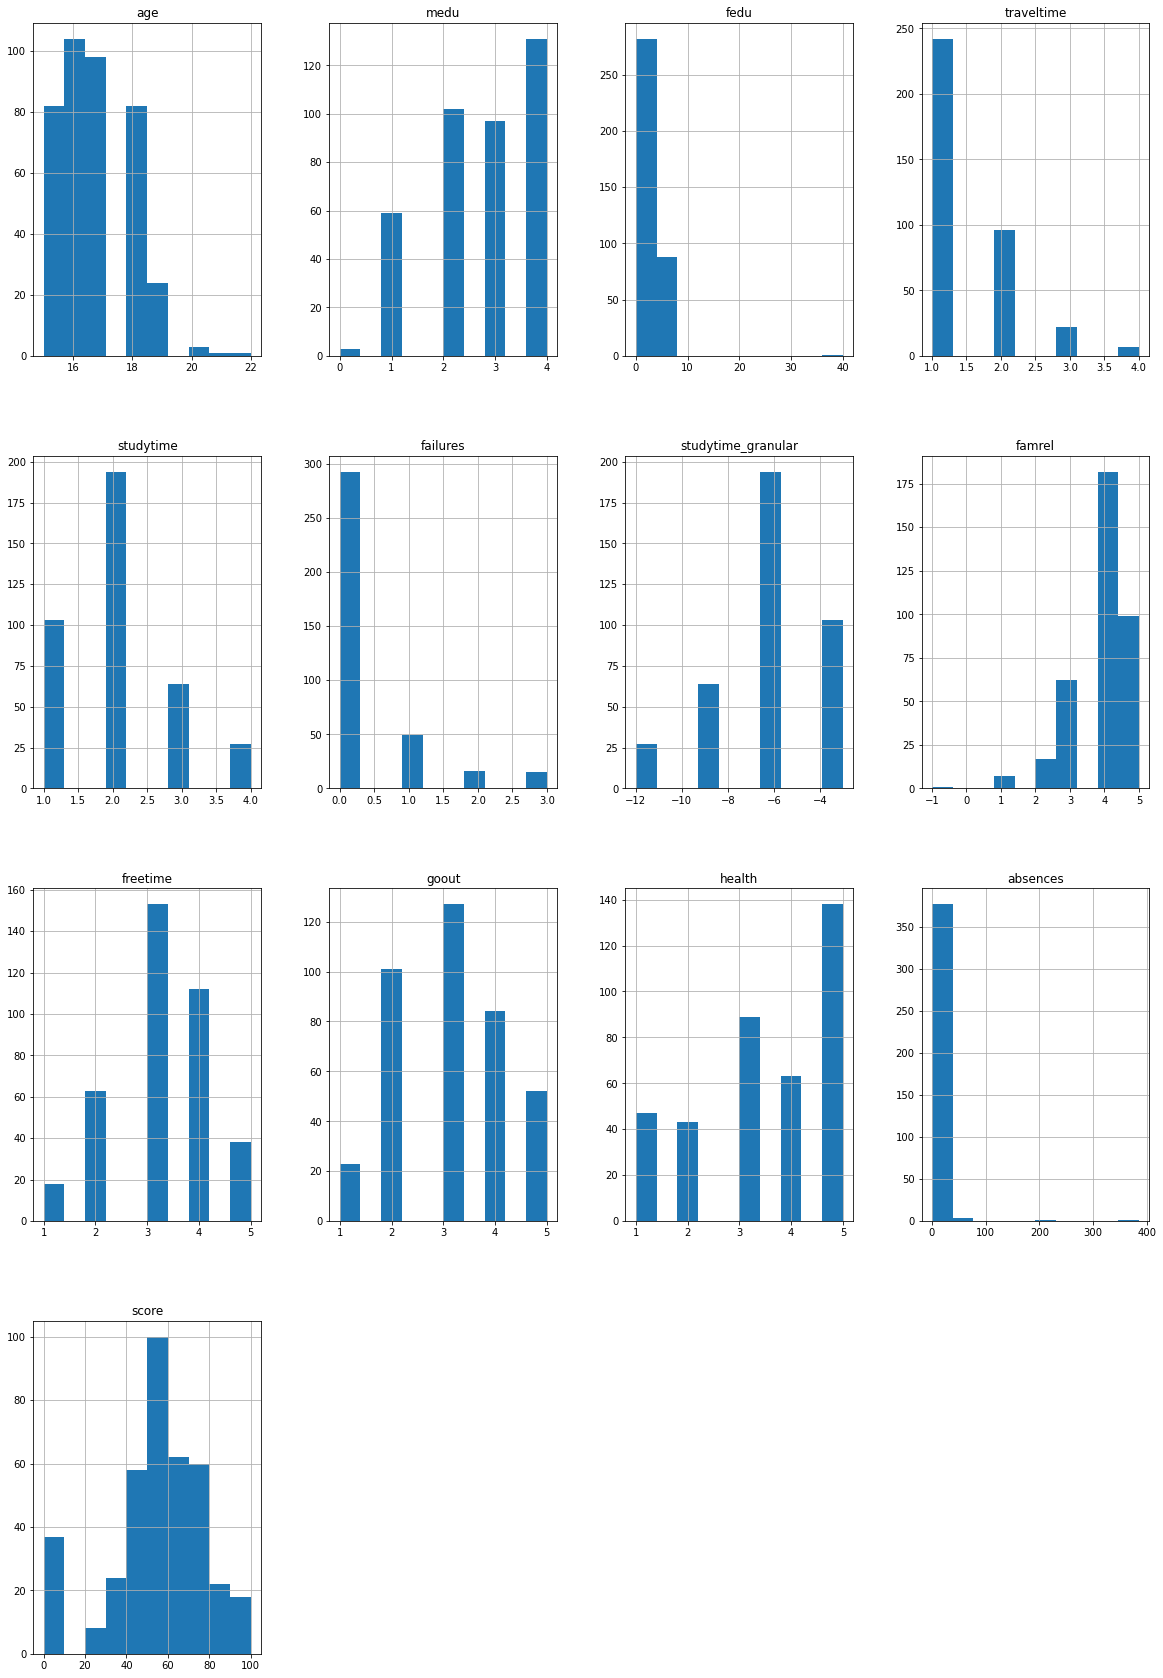

In [10]:
stud.hist(figsize=(20, 30))

Столбец **score** содержит значения предсказываемой величины и в нем не допустимы пропуски.
Удаляем строки с пропусками в этом столбце.

In [11]:
stud.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [12]:
stud.dropna(subset=['score'], inplace=True)

In [13]:
stud.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


Зависимость между столбцами **studytime** и **studytime_granular**:

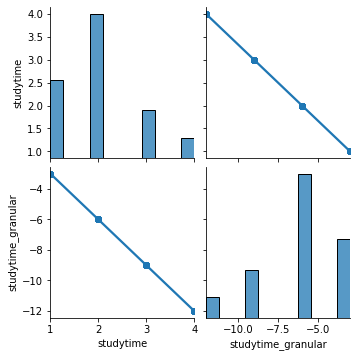

In [14]:
stud_corr = ['studytime', 'studytime_granular']
sns.pairplot(stud[stud_corr], kind = 'reg')

Между столбцами **studytime** и **studytime_granular** - полная отрицательная корреляция.
Столбец **studytime_granular** удаляем.

In [15]:
stud.drop('studytime_granular', axis=1, inplace=True)

In [16]:
stud.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob     fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  \
0         no     yes    yes      NaN       no     4.0       3.0    4.0   
1         no      no    yes      yes       no     5.0       3.0    3.0   
2         no     yes    yes      yes      NaN     4.0       3.0    2.0   
3        yes     yes    yes      yes      yes     3.0       2.0    2.0   
4         no     yes    yes       no       no     4.0       3.0    2.0   
5        yes     yes    yes      yes       no     5.0       4.0    2.0   
6         no     yes    yes      yes       no     4.0       4.0    4.0   
7         no     yes    yes       no       no     4.0       1.0    4.0   
8         no     yes    yes      yes       no     NaN       2.0    2.0   
9        yes     yes    yes      yes       no     5.0       5.0    1.0   

   health  absences  score  
0     3.0       6.0   30.0  
1     3.0       4.0   30.0  
2     3.0      10.0   50.0  
3     5.0       2.0   75.0  
4     5.0       4.0   50.0  
5     5.0      10.0   75.0  
6     3.0       0.0   55.0  
7     1.0       6.0   30.0  
8     1.0       0.0   95.0  
9     5.0       0.0   75.0

Столбец **age**

In [17]:
stud.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [18]:
pd.DataFrame(stud.age.value_counts(dropna=False))

age
16  103
17   98
15   82
18   80
19   21
20    3
22    1
21    1

Пропусков нет, данные корректны.

Столбцы **medu** и **fedu**

In [19]:
stud.loc[:, ['medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [20]:
stud.loc[:, ['fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [21]:
stud.medu.describe()

count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

In [22]:
stud.fedu.describe()

count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

In [23]:
pd.DataFrame(stud.medu.value_counts(dropna=False))

medu
4.0   131
2.0   100
3.0    96
1.0    56
0.0     3
NaN     3

In [24]:
pd.DataFrame(stud.fedu.value_counts(dropna=False))

fedu
2.0    105
3.0     94
4.0     88
1.0     75
NaN     24
0.0      2
40.0     1

Есть выброс в столбце **fedu** - "40", заменим его на "4". Поскольку есть пропуски - разумно объеденить столбцы с уровнем образования родителей в один общий, который будет содержать их сумму.

In [25]:
stud.fedu = stud.fedu.replace(40, 4)
stud['totedu'] = stud.fedu + stud.medu

In [26]:
stud.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob     fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  \
0         no     yes    yes      NaN       no     4.0       3.0    4.0   
1         no      no    yes      yes       no     5.0       3.0    3.0   
2         no     yes    yes      yes      NaN     4.0       3.0    2.0   
3        yes     yes    yes      yes      yes     3.0       2.0    2.0   
4         no     yes    yes       no       no     4.0       3.0    2.0   
5        yes     yes    yes      yes       no     5.0       4.0    2.0   
6         no     yes    yes      yes       no     4.0       4.0    4.0   
7         no     yes    yes       no       no     4.0       1.0    4.0   
8         no     yes    yes      yes       no     NaN       2.0    2.0   
9        yes     yes    yes      yes       no     5.0       5.0    1.0   

   health  absences  score  totedu  
0     3.0       6.0   30.0     8.0  
1     3.0       4.0   30.0     2.0  
2     3.0      10.0   50.0     2.0  
3     5.0       2.0   75.0     6.0  
4     5.0       4.0   50.0     6.0  
5     5.0      10.0   75.0     7.0  
6     3.0       0.0   55.0     4.0  
7     1.0       6.0   30.0     8.0  
8     1.0       0.0   95.0     5.0  
9     5.0       0.0   75.0     7.0

Столбец **traveltime**

In [27]:
stud.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  361 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [28]:
stud.traveltime.describe()

count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [29]:
pd.DataFrame(stud.traveltime.value_counts(dropna=False))

traveltime
1.0         239
2.0          94
NaN          28
3.0          21
4.0           7

Есть пропуски, выбросов нет.

Столбец **studytime**

In [30]:
stud.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [31]:
stud.studytime.describe()

count    382.000000
mean       2.036649
std        0.847239
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [32]:
pd.DataFrame(stud.studytime.value_counts(dropna=False))

studytime
2.0        189
1.0        103
3.0         63
4.0         27
NaN          7

Есть пропуски, выбросов нет.

Столбец **failures**

In [33]:
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  367 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [34]:
stud.failures.describe()

count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [35]:
pd.DataFrame(stud.failures.value_counts(dropna=False))

failures
0.0       290
1.0        48
NaN        22
2.0        15
3.0        14

Есть пропуски, выбросов нет.

Столбец **famrel**

In [36]:
stud.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  362 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [37]:
stud.famrel.describe()

count    362.000000
mean       3.930939
std        0.931554
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [38]:
pd.DataFrame(stud.famrel.value_counts(dropna=False))

famrel
 4.0     178
 5.0      97
 3.0      62
 NaN      27
 2.0      17
 1.0       7
-1.0       1

Есть пропуски. Есть выброс со значением "-1", заменим его на "1".

In [39]:
stud.famrel = stud.famrel.replace(-1, 1)

Столбец **freetime**

In [40]:
stud.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  380 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [41]:
stud.freetime.describe()

count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [42]:
pd.DataFrame(stud.freetime.value_counts(dropna=False))

freetime
3.0       152
4.0       110
2.0        63
5.0        37
1.0        18
NaN         9

Есть пропуски, выбросов нет.

Столбец **goout**

In [43]:
stud.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [44]:
stud.goout.describe()

count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [45]:
pd.DataFrame(stud.goout.value_counts(dropna=False))

goout
3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
NaN      7

Есть пропуски, выбросов нет.

Столбец **health**

In [46]:
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  374 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [47]:
stud.health.describe()

count    374.000000
mean       3.529412
std        1.402006
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [48]:
pd.DataFrame(stud.health.value_counts(dropna=False))

health
5.0     137
3.0      88
4.0      60
1.0      47
2.0      42
NaN      15

Есть пропуски, выбросов нет.

Столбец **absences**

In [49]:
stud.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [50]:
stud.absences.describe()

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [51]:
pd.DataFrame(stud.absences.value_counts(dropna=False))

absences
0.0         110
2.0          60
4.0          52
6.0          30
8.0          20
10.0         17
12.0         12
14.0         12
NaN          11
16.0          7
3.0           7
7.0           6
5.0           5
18.0          5
20.0          4
1.0           3
22.0          3
9.0           3
13.0          2
15.0          2
11.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
212.0         1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
17.0          1
28.0          1

Есть пропуски, есть выбросы. Выбросы решено заменить на медиану.

In [52]:
stud.absences = stud.absences.apply(
    lambda x: stud.absences.median() if x > 100 else x)

В числовых столбцах с пропусками заменяем пропуски на медиану.

In [53]:
numeric = ['traveltime', 'studytime', 'failures',
           'famrel', 'freetime', 'goout', 'health', 'absences']
for column in numeric:
    median_ = stud[column].median()
    stud[column].fillna(value=median_, inplace=True, axis=0)

# Промежуточные выводы:
1. Столбец **score** содержит значения предсказываемой величины и в нем не допустимы пропуски.
Удаляем строки с пропусками в этом столбце.
2. Между столбцами **studytime** и **studytime_granular** - полная отрицательная корреляция.
Столбец **studytime_granular** удаляем.
3. Есть выброс в столбце **fedu** - "40", заменим его на "4". Поскольку есть пропуски - разумно объеденить столбцы с уровнем образования родителей в один общий **totedu**, который будет содержать их сумму.
4. В столбце **famrel** есть выброс со значением "-1", заменим его на "1".

# Оценка количества уникальных значений для номинативных переменных

In [54]:
stud.select_dtypes(include='object').nunique()

school        2
sex           2
address       2
famsize       2
pstatus       2
mjob          5
fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

Столбец **address**

In [55]:
pd.DataFrame(stud.address.value_counts(dropna=False))

address
U        291
R         83
NaN       15

Столбец **famsize**

In [56]:
pd.DataFrame(stud.famsize.value_counts(dropna=False))

famsize
GT3      255
LE3      107
NaN       27

Столбец **pstatus**

In [57]:
pd.DataFrame(stud.pstatus.value_counts(dropna=False))

pstatus
T        308
NaN       45
A         36

Столбец **mjob**

In [58]:
pd.DataFrame(stud.mjob.value_counts(dropna=False))

mjob
other      127
services    98
at_home     58
teacher     55
health      32
NaN         19

Столбец **fjob**

In [59]:
pd.DataFrame(stud.fjob.value_counts(dropna=False))

fjob
other      194
services    99
NaN         36
teacher     29
at_home     16
health      15

Столбец **reason**

In [60]:
pd.DataFrame(stud.reason.value_counts(dropna=False))

reason
course         135
reputation     102
home           101
other           34
NaN             17

Столбец **guardian**

In [61]:
pd.DataFrame(stud.guardian.value_counts(dropna=False))

guardian
mother       248
father        86
NaN           31
other         24

Столбец **schoolsup**

In [62]:
pd.DataFrame(stud.schoolsup.value_counts(dropna=False))

schoolsup
no         331
yes         49
NaN          9

Столбец **famsup**

In [63]:
pd.DataFrame(stud.famsup.value_counts(dropna=False))

famsup
yes     216
no      135
NaN      38

Столбец **paid**

In [64]:
pd.DataFrame(stud.paid.value_counts(dropna=False))

paid
no    197
yes   153
NaN    39

Столбец **activities**

In [65]:
pd.DataFrame(stud.activities.value_counts(dropna=False))

activities
yes         192
no          183
NaN          14

Столбец **nursery**

In [66]:
pd.DataFrame(stud.nursery.value_counts(dropna=False))

nursery
yes      297
no        77
NaN       15

Столбец **higher**

In [67]:
pd.DataFrame(stud.higher.value_counts(dropna=False))

higher
yes     350
NaN      20
no       19

Столбец **internet**

In [68]:
pd.DataFrame(stud.internet.value_counts(dropna=False))

internet
yes       300
no         55
NaN        34

Столбец **romantic**

In [69]:
pd.DataFrame(stud.romantic.value_counts(dropna=False))

romantic
no        235
yes       123
NaN        31

Для всех столбцов с номинативными переменными заменяем пропуски на моду.

In [70]:
nominal = ['address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason',
           'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
           'nursery', 'higher', 'internet', 'romantic']
for column in nominal:
    mode_ = stud[column].mode()[0]
    stud[column].fillna(value=mode_, inplace=True, axis=0)

# Корреляционный анализ 

Для численных непрерывных переменных, которые могут быть выражены дискретно + для закодированных числами номинативных переменных с соотношением порядка (ранговых, оценочных). Вместо столбцов **fedu** и **medu** анализируется общий столбец **totedu**.

In [71]:
stud.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob     fjob  \
0     GP   F   18       U     GT3       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3       T   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health    other   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16       U     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     GT3       T   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no   no   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  \
0         no     yes    yes      yes       no     4.0       3.0    4.0   
1         no      no    yes      yes       no     5.0       3.0    3.0   
2         no     yes    yes      yes       no     4.0       3.0    2.0   
3        yes     yes    yes      yes      yes     3.0       2.0    2.0   
4         no     yes    yes       no       no     4.0       3.0    2.0   
5        yes     yes    yes      yes       no     5.0       4.0    2.0   
6         no     yes    yes      yes       no     4.0       4.0    4.0   
7         no     yes    yes       no       no     4.0       1.0    4.0   
8         no     yes    yes      yes       no     4.0       2.0    2.0   
9        yes     yes    yes      yes       no     5.0       5.0    1.0   

   health  absences  score  totedu  
0     3.0       6.0   30.0     8.0  
1     3.0       4.0   30.0     2.0  
2     3.0      10.0   50.0     2.0  
3     5.0       2.0   75.0     6.0  
4     5.0       4.0   50.0     6.0  
5     5.0      10.0   75.0     7.0  
6     3.0       0.0   55.0     4.0  
7     1.0       6.0   30.0     8.0  
8     1.0       0.0   95.0     5.0  
9     5.0       0.0   75.0     7.0

Text(0, 0.5, 'score')

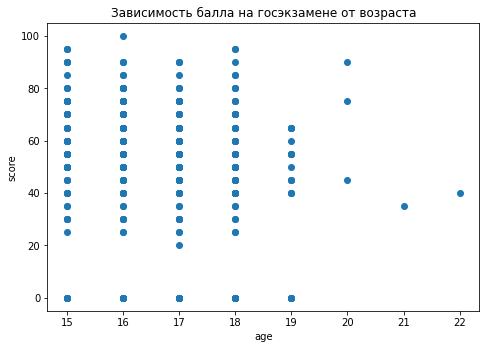

In [72]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['age'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от возраста')
axes.set_xlabel('age')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

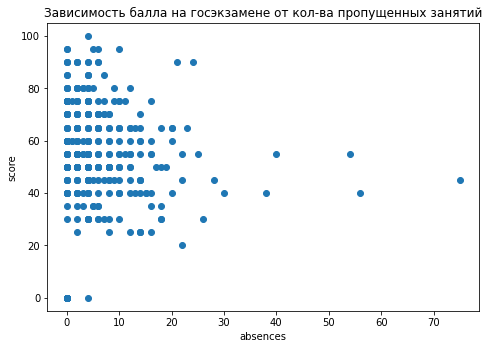

In [73]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['absences'], y=stud['score'], marker='o')
axes.set_title(
    'Зависимость балла на госэкзамене от кол-ва пропущенных занятий')
axes.set_xlabel('absences')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

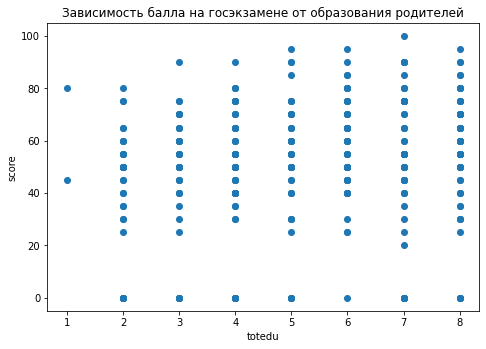

In [74]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['totedu'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от образования родителей')
axes.set_xlabel('totedu')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

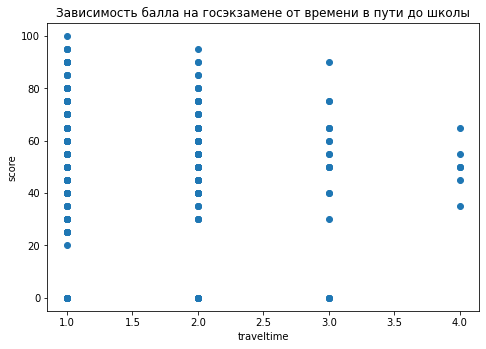

In [75]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['traveltime'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от времени в пути до школы')
axes.set_xlabel('traveltime')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

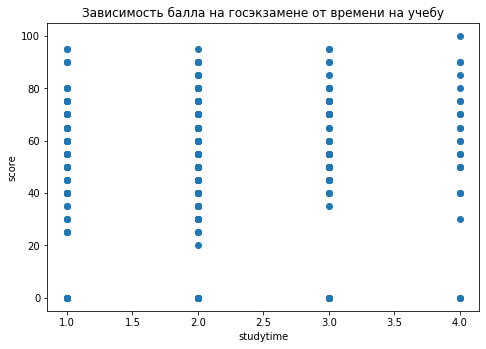

In [76]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['studytime'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от времени на учебу')
axes.set_xlabel('studytime')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

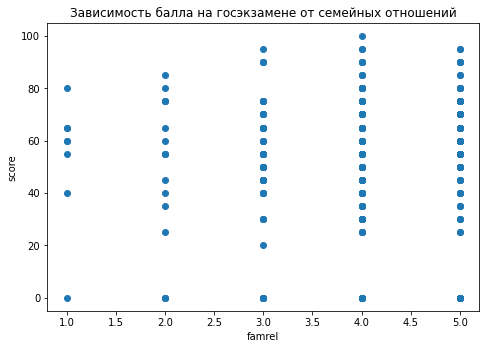

In [77]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['famrel'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от семейных отношений')
axes.set_xlabel('famrel')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

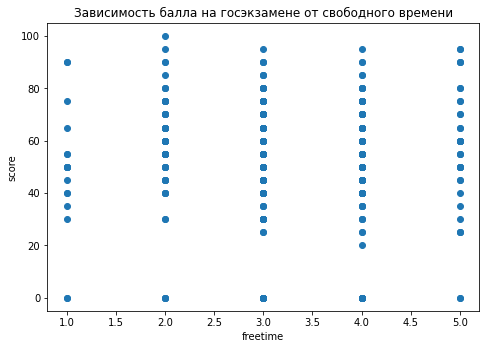

In [78]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['freetime'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от свободного времени')
axes.set_xlabel('freetime')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

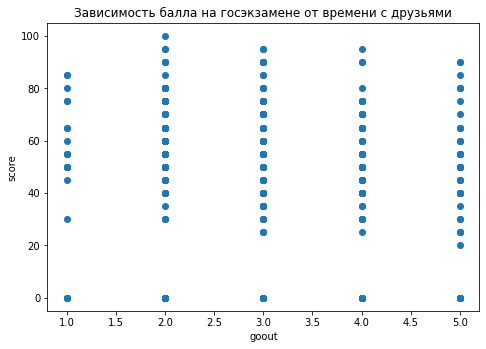

In [79]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['goout'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от времени с друзьями')
axes.set_xlabel('goout')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

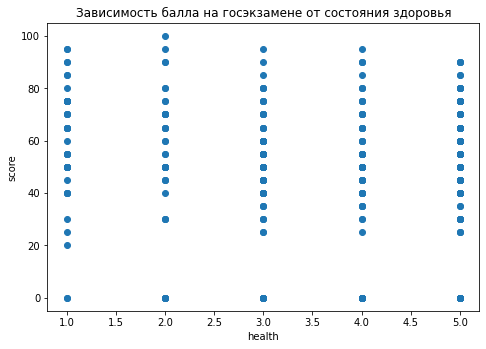

In [80]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['health'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от состояния здоровья')
axes.set_xlabel('health')
axes.set_ylabel('score')

Text(0, 0.5, 'score')

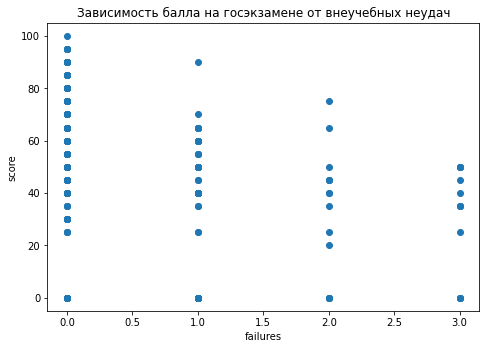

In [81]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['failures'], y=stud['score'], marker='o')
axes.set_title('Зависимость балла на госэкзамене от внеучебных неудач')
axes.set_xlabel('failures')
axes.set_ylabel('score')

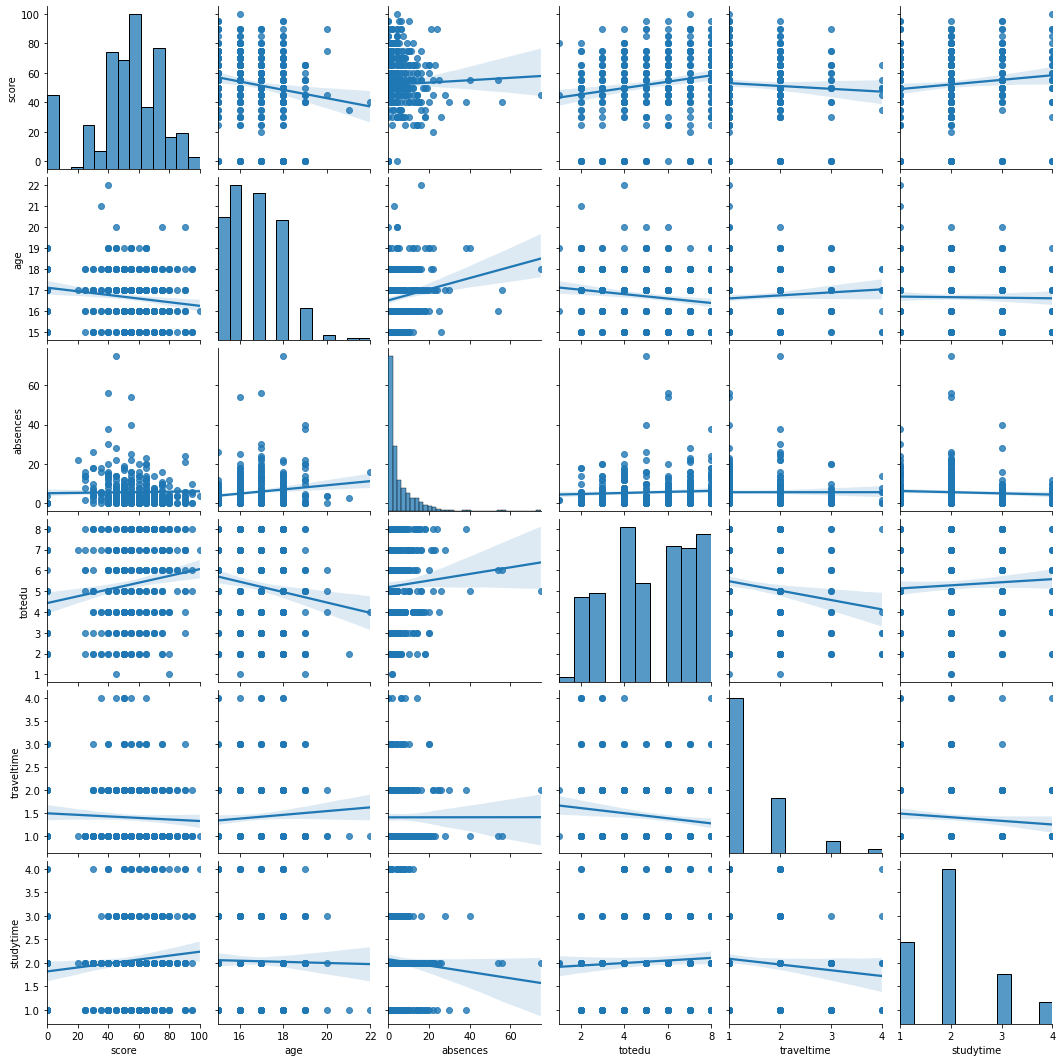

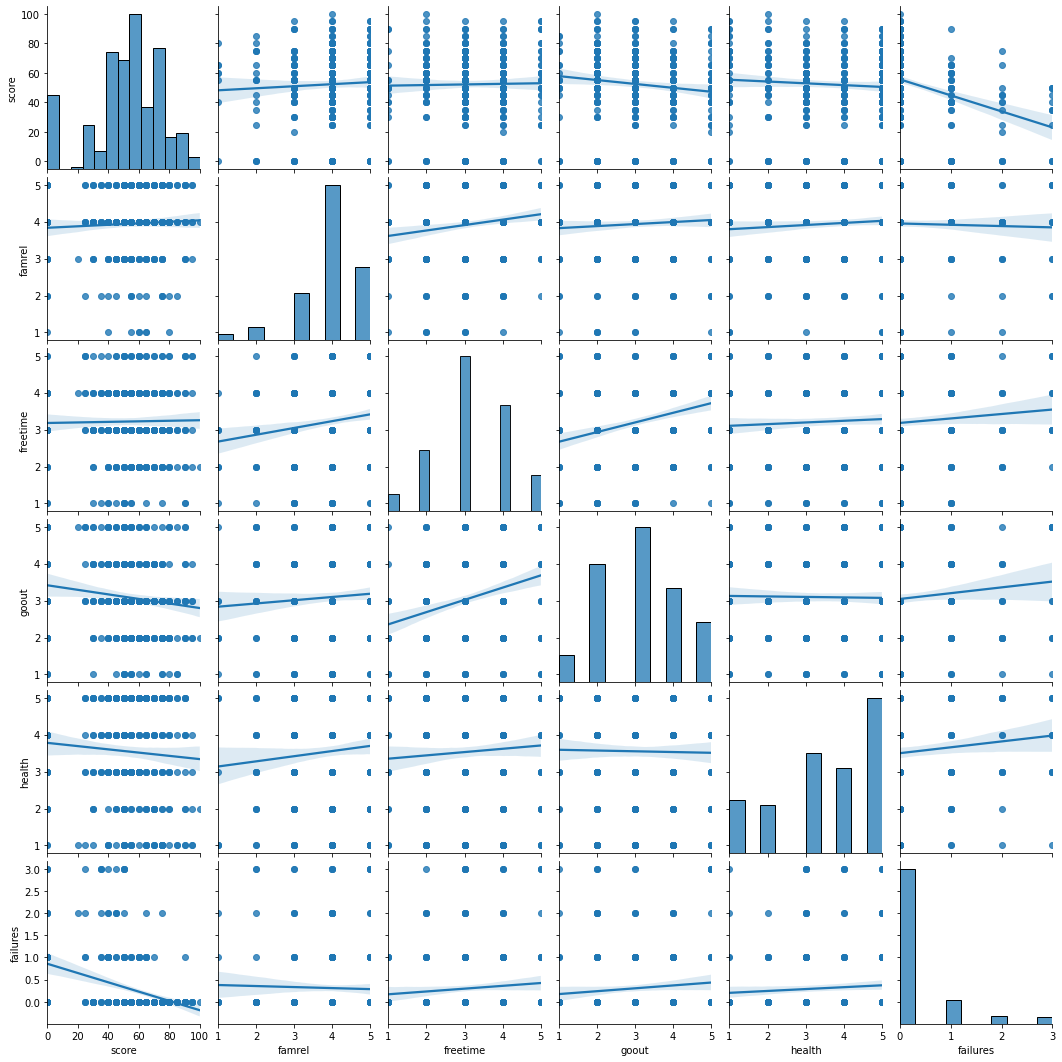

In [82]:
stud_main = ['score', 'age', 'absences', 'totedu', 'traveltime', 'studytime']
stud_main2 = ['score', 'famrel', 'freetime', 'goout', 'health', 'failures']
sns.pairplot(stud[stud_main], kind='reg')
sns.pairplot(stud[stud_main2], kind='reg')

In [83]:
stud_main3 = ['score', 'age', 'absences', 'totedu', 'traveltime',
              'studytime', 'famrel', 'freetime', 'goout', 'health', 'failures']
display(stud[stud_main3].corr())

score       age  absences    totedu  traveltime  studytime  \
score       1.000000 -0.155726  0.028220  0.186997   -0.056535   0.114295   
age        -0.155726  1.000000  0.167024 -0.161568    0.076013  -0.018019   
absences    0.028220  0.167024  1.000000  0.064993    0.000573  -0.064045   
totedu      0.186997 -0.161568  0.064993  1.000000   -0.157978   0.063475   
traveltime -0.056535  0.076013  0.000573 -0.157978    1.000000  -0.098226   
studytime   0.114295 -0.018019 -0.064045  0.063475   -0.098226   1.000000   
famrel      0.052902  0.056941 -0.041409 -0.015862   -0.029213   0.037950   
freetime    0.017481  0.013994 -0.070327  0.006438   -0.016696  -0.122057   
goout      -0.127742  0.121057  0.035627  0.064961    0.046390  -0.053554   
health     -0.073208 -0.065719 -0.022599 -0.035695   -0.035852  -0.072790   
failures   -0.337187  0.206279  0.060360 -0.286747    0.035113  -0.169399   

              famrel  freetime     goout    health  failures  
score       0.052902  0.017481 -0.127742 -0.073208 -0.337187  
age         0.056941  0.013994  0.121057 -0.065719  0.206279  
absences   -0.041409 -0.070327  0.035627 -0.022599  0.060360  
totedu     -0.015862  0.006438  0.064961 -0.035695 -0.286747  
traveltime -0.029213 -0.016696  0.046390 -0.035852  0.035113  
studytime   0.037950 -0.122057 -0.053554 -0.072790 -0.169399  
famrel      1.000000  0.164830  0.069514  0.088845 -0.028517  
freetime    0.164830  1.000000  0.294450  0.063718  0.087558  
goout       0.069514  0.294450  1.000000 -0.016427  0.101036  
health      0.088845  0.063718 -0.016427  1.000000  0.082165  
failures   -0.028517  0.087558  0.101036  0.082165  1.000000

Корреляция столбца **score** и столбцов **freetime**, **absences** крайне низкая, их можно удалить.
Наиболее высокая корреляция у столбца **score** со столбцами **failures** и **totedu**. Возможно, эти столбцы окажутся наиболее важными из рассмотренных в корреляционном анализе при будущем построении модели машинного обучения.

In [84]:
stud.drop(['freetime', 'absences'], axis=1, inplace=True)

# Анализ номинативных признаков

Строим boxplot графики по 10 самым частотным значениям в столбцах с номинативными признаками. И смотрим различается ли распределение итоговых баллов на госэкзамене (значения столбца **score**) в зависимости от значения этих переменных.

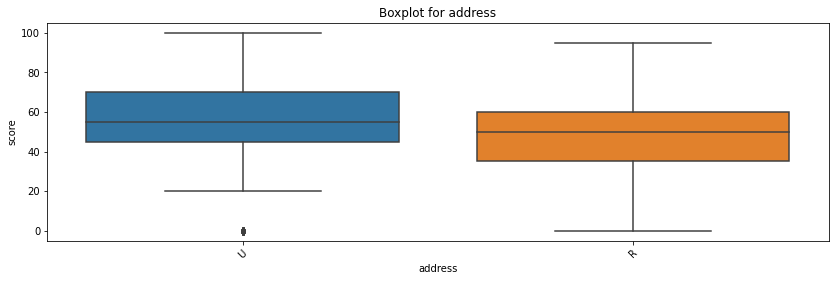

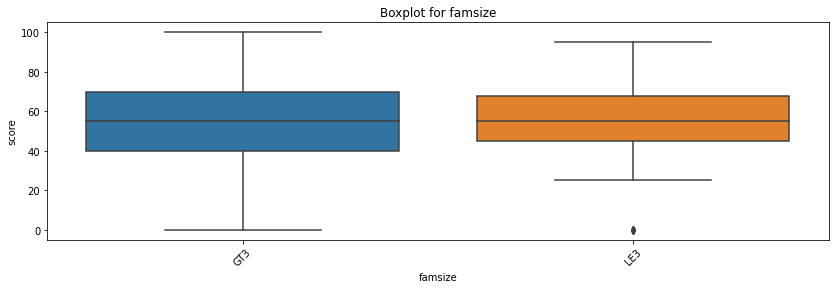

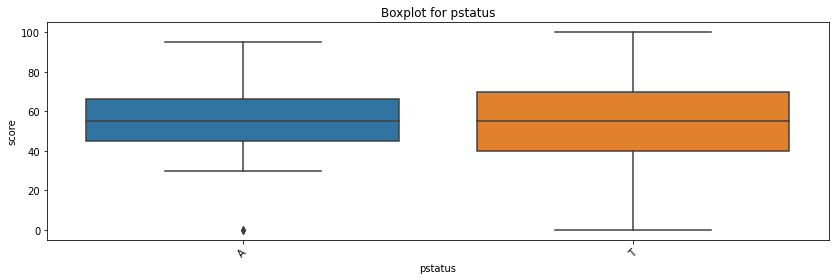

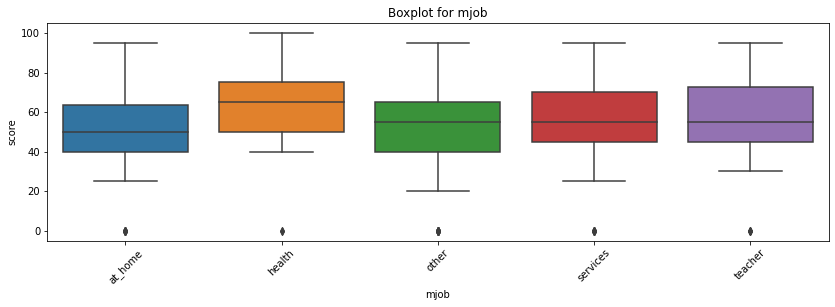

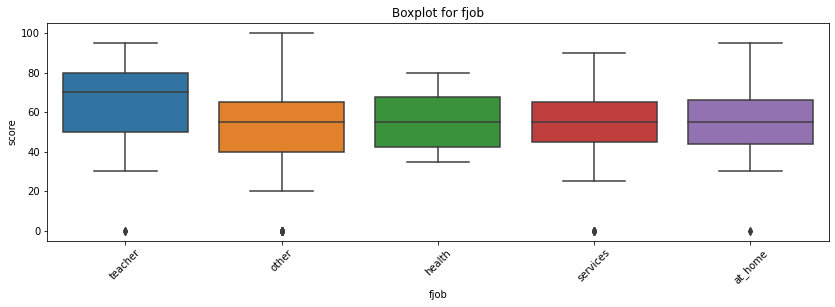

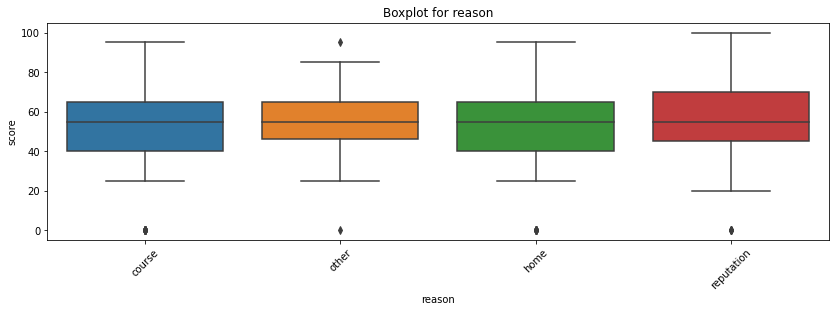

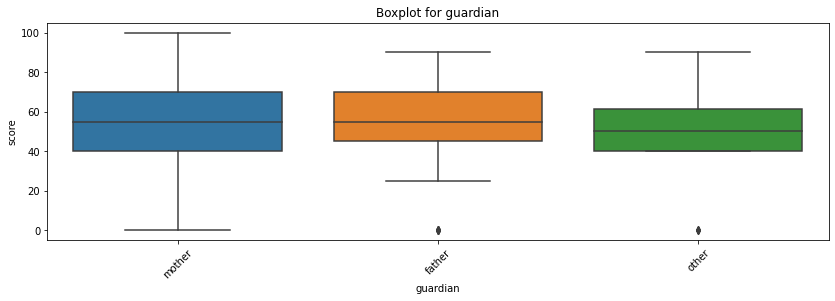

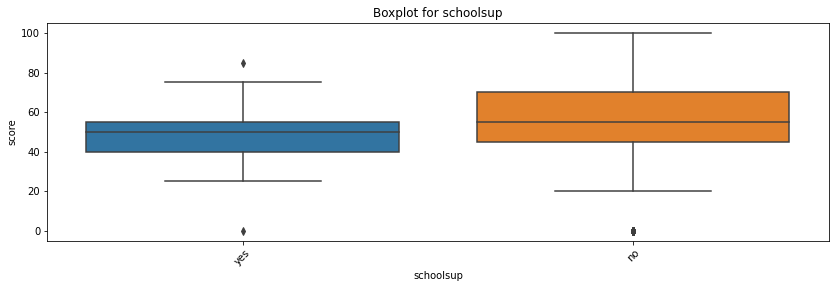

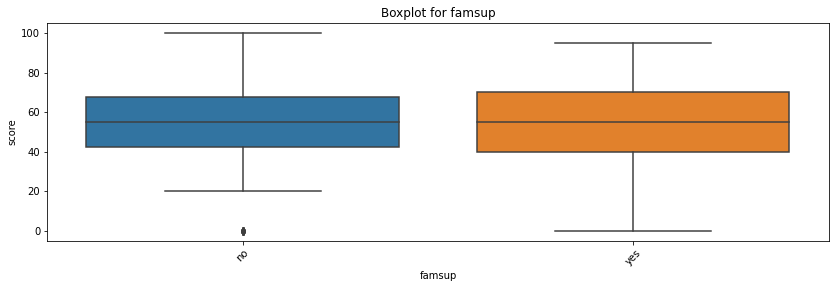

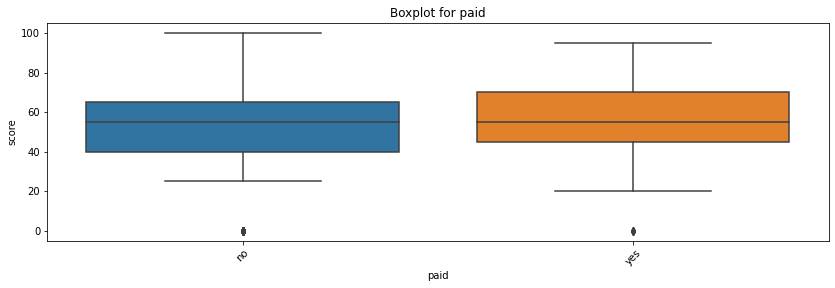

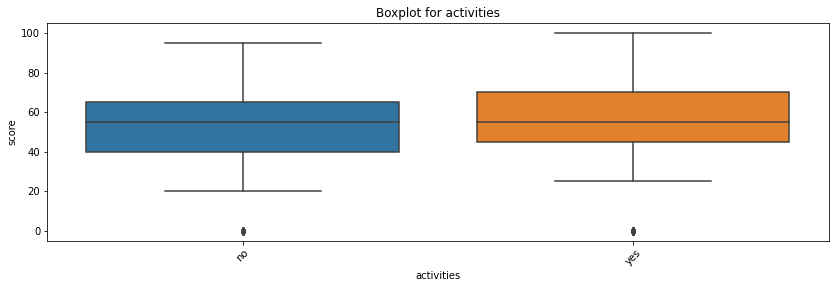

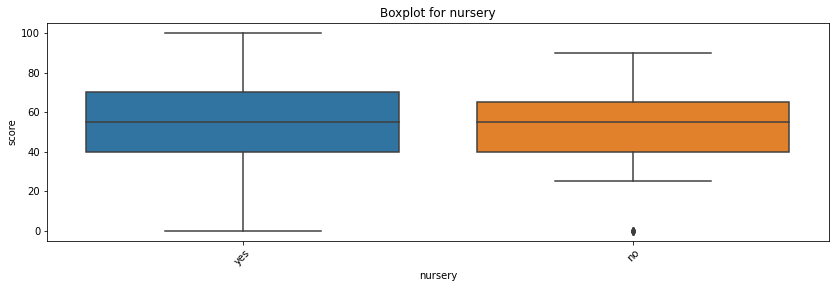

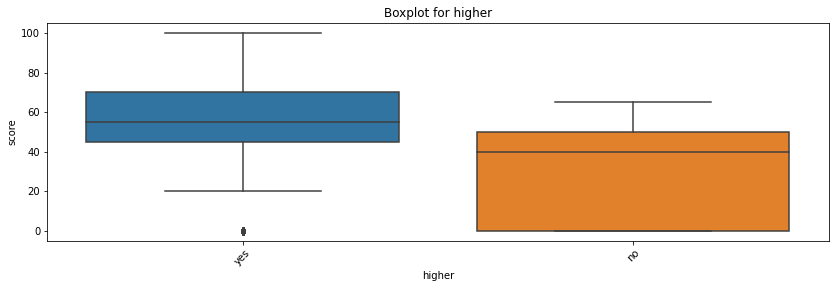

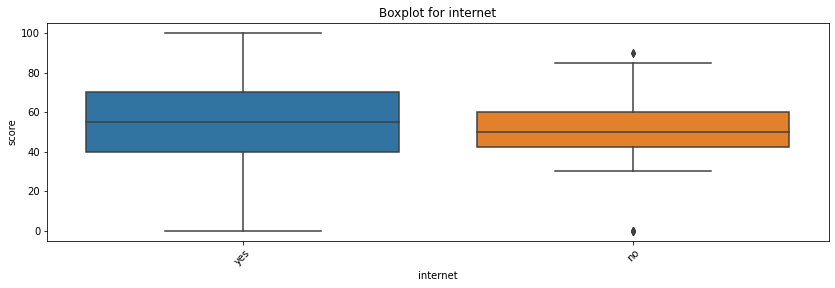

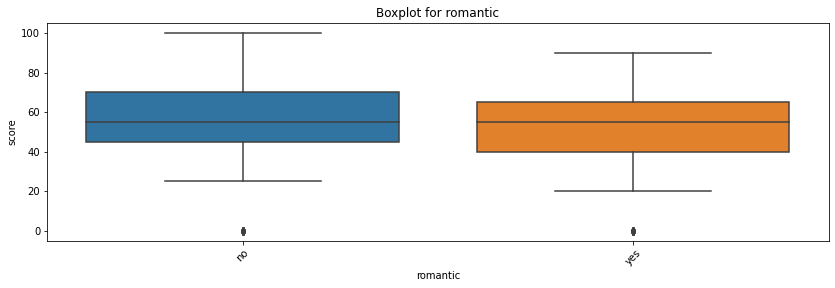

In [85]:
for col in ['address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении баллов по госэкзамену по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [86]:
for col in ['address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки famsize
Найдены статистически значимые различия для колонки pstatus
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки reason
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки nursery
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки internet
Найдены статистически значимые различия для колонки romantic


Не найдено статистически важных различий только для колонок **famsup** и **activities**. Эти колонки удаляем.

In [87]:
stud.drop(['famsup', 'activities'], axis=1, inplace=True)

Сохранение в файл.

In [88]:
stud.to_csv('result_module2.csv')

# Выводы:

1. Данные довольно качественные.
2. Датафрейм относительно небольшого размера, поэтому удалять строки с пропусками без серьезной причины нельзя. Были удалены строки с пропусками только в столбце **score**, который содержит значения предсказываемой величины.
3. Между столбцами **studytime** и **studytime_granular** - полная отрицательная корреляция.
Столбец **studytime_granular** удалили.
4. Из столбцов **fedu**, **medu** создан новый **totedu**, что избавило от пропусков. 
4. Выбросы, которые были найдены, заменялись на наиболее логично подходящие значения.
5. Для всех столбцов с номинативными переменными заменены пропуски на моду.
6. Для столбцов с числовыми значениями с пропусками - пропуски были заменены на медиану.
7. Был произведен корреляционный анализ числовых переменных. Столбцы, у которых корреляция со столбцом **score** оказалась крайне незначильной были удалены. Наиболее высокая корреляция у столбца **score** со столбцами **failures** и **totedu**. Возможно, эти столбцы окажутся наиболее важными из рассмотренных в корреляционном анализе при будущем построении модели машинного обучения.
8. Произведен анализ номинативных признаков. Было проверено наличие статистической разницы в распределении баллов по госэкзамену по номинативным признакам, с помощью теста Стьюдента. Построены **boxplot** графики по 10 самым частотным значениям в столбцах с номинативными признаками. Столбцы, где не было найдено статистически важных различий и при этом признаки на boxplot графиках различались незначительно - были удалены.
9. Очевидно, что пары столбцов **mjob**, **fjob** и **schoolsup**, **famsup** и **freetime**, **goout** несут похожую смысловую нагрузку. **mjob**, **fjob** можно попробовать по отдельности и в объединенном варианте при построении модели машинного обучения. Поскольку в процессе анализа номинативных признаков столбец **famsup** был удален - из пары **schoolsup**, **famsup** можно использовать только **schoolsup**. Поскольку в процессе корреляционного анализа столбец **freetime** был удален - из пары **freetime**, **goout** можно использовать только **goout**.

Для дальнейшего анализа рекомендуется использовать Итоговый датафрейм:

In [89]:
stud.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob     fjob  \
0     GP   F   18       U     GT3       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3       T   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health    other   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16       U     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     GT3       T   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup paid  \
0      course   mother         2.0        2.0       0.0       yes   no   
1      course   father         1.0        2.0       0.0        no   no   
2       other   mother         1.0        2.0       3.0       yes   no   
3        home   mother         1.0        3.0       0.0        no  yes   
4        home   father         1.0        2.0       0.0        no  yes   
5  reputation   mother         1.0        2.0       0.0        no  yes   
6        home   mother         1.0        2.0       0.0        no   no   
7        home   mother         2.0        2.0       0.0       yes   no   
8        home   mother         1.0        2.0       0.0        no  yes   
9        home   mother         1.0        2.0       0.0        no  yes   

  nursery higher internet romantic  famrel  goout  health  score  totedu  
0     yes    yes      yes       no     4.0    4.0     3.0   30.0     8.0  
1      no    yes      yes       no     5.0    3.0     3.0   30.0     2.0  
2     yes    yes      yes       no     4.0    2.0     3.0   50.0     2.0  
3     yes    yes      yes      yes     3.0    2.0     5.0   75.0     6.0  
4     yes    yes       no       no     4.0    2.0     5.0   50.0     6.0  
5     yes    yes      yes       no     5.0    2.0     5.0   75.0     7.0  
6     yes    yes      yes       no     4.0    4.0     3.0   55.0     4.0  
7     yes    yes       no       no     4.0    4.0     1.0   30.0     8.0  
8     yes    yes      yes       no     4.0    2.0     1.0   95.0     5.0  
9     yes    yes      yes       no     5.0    1.0     5.0   75.0     7.0